# 2440054001_Cheryl Almeira_LB01_Final Excam Machine Learning

#### 1. [LO 1, LO 2 & LO 3, 25 poin] Salah satu algoritma yang sering digunakan dalam penyelesaian proses klasifikasi adalah metode K-Nearest Neighbor. Buatlah program dengan menggunakan bahasa pemrograman python untuk metode K-Nearest Neighbor yang optimal dengan menggunakan dataset “knn_dataset.csv”. Program harus mengandung aturan di bawah:

- Import Library & Dataset

In [222]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
df = pd.read_csv('knn_datasets.csv')
df.head()

X1   X2    X3  X4   X5    X6     X7  X8  X9
0   3  126  88.0  41  235  39.3  0.704  27   0
1   8   99  84.0   0    0  35.4  0.388  50   0
2   7  196  90.0   0    0  39.8  0.451  41   1
3   9  119  80.0  35    0  29.0  0.263  29   1
4  11  143  94.0  33  146  36.6  0.254  51   1

- Exploratory Data Analyst (EDA)

Penggunaan EDA memiliki tujuan untuk melakukan proses agar lebih mengenali data

- Data Type untuk tiap kolom

In [224]:
df.dtypes

X1      int64
X2      int64
X3    float64
X4      int64
X5      int64
X6    float64
X7    float64
X8      int64
X9      int64
dtype: object

Dari data tersebut dapat disimpulkan bahwa data memiliki 9 kolom, dengan X3, X6, X7 adalah float64 dan sisanya adalah int64

- Dimensi Data

In [225]:
df.shape

(480, 9)

Dari data tersebut dapat disimpulkan bahwa data memiliki 480 baris dengan 9 kolom

- Data Kosong (Data NaN)

In [226]:
df.isna().sum()

X1    0
X2    0
X3    1
X4    0
X5    0
X6    0
X7    0
X8    0
X9    0
dtype: int64

<AxesSubplot:>

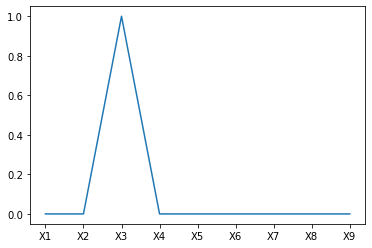

In [227]:
df.isna().sum().plot()

Dari plot tersebut dapat disimpulkan terdapat 1 data NaN di X3

Jumlah Tiap Label pada Target

In [228]:
df['X9'].value_counts()

0    311
1    169
Name: X9, dtype: int64

In [229]:
count = 311+169
print('Persentase Label 0 :', 311/count)
print('Persentase Label 1 :', 169/count)

Persentase Label 0 : 0.6479166666666667
Persentase Label 1 : 0.35208333333333336


Dilihat dari data tersebut dapat dilihat bahwa dataset tidak balance atau tidak seimbang jika melihat perbandingan labelnya. 
Hal ini dapat menyebabkan bias pada prediksi nanti, karena model bisa saja lebih banyak memprediksi data = 1

Cek Outlier

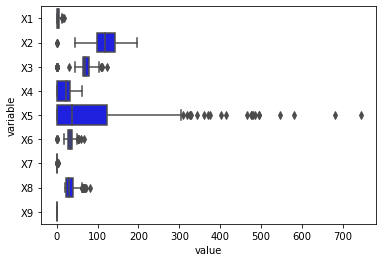

In [230]:
sns.boxplot(x="value", y="variable", color='blue',orient='h', data=pd.melt(df))

plt.show()

Dari boxplot tersebut terlihat bahwa terdapat outlier di X1, X2, X3, X5, X6 dan X8

#### a. Terdapat praproses data yang tepat untuk menyelesaikan problem di atas

- Mengganti data kosong (Data NaN)

In [231]:
df = df.fillna(0)

<AxesSubplot:>

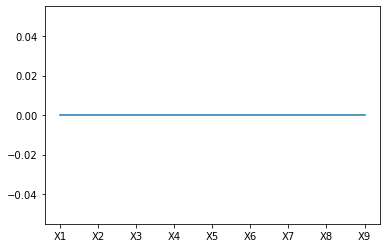

In [232]:
df.isna().sum().plot()

Dapat dilihat pada plot diatas sataset sudah bersih dari data NaN atau data kosong

#### b. Untuk mempercepat proses komputasi, silahkan diprogram anda harus ada algoritma yang memilih attributes yang memiliki korelasi tinggi terhadap target (X9).

- Menggunakan korelasi pearson

Penggunaan korelasi pearson untuk mencari korelasi tertinggi dari variabel independen terhadap variabel dependen

In [233]:
df[df.columns[0:]].corr(method='pearson')['X9'][:].sort_values()

X3    0.032888
X4    0.051739
X5    0.119389
X7    0.177169
X8    0.195662
X1    0.226904
X6    0.333234
X2    0.442458
X9    1.000000
Name: X9, dtype: float64

Dari data tersebut dapat dilihat bahwa X2 adalah kolom dengan korelasi tertinggi dan X3 adalah yang terendah, mayoritas kolom memiliki skor korelasi dengan penyebaran 0.1 hingga 0.44, maka diputuskan X3, dan X4 untuk dibuang.

In [234]:
df = df.drop(columns=['X3','X4'])
df

X1   X2   X5    X6     X7  X8  X9
0     3  126  235  39.3  0.704  27   0
1     8   99    0  35.4  0.388  50   0
2     7  196    0  39.8  0.451  41   1
3     9  119    0  29.0  0.263  29   1
4    11  143  146  36.6  0.254  51   1
..   ..  ...  ...   ...    ...  ..  ..
475   6  166    0  26.6  0.304  66   0
476   5  110    0  26.0  0.292  30   0
477   2   81   76  30.1  0.547  25   0
478   7  195  145  25.1  0.163  55   1
479   6  154  193  29.3  0.839  39   0

[480 rows x 7 columns]

X3, dan X4 sudah berhasil dibuang

- Menangani Outlier dengan IQR

Menangani outlier dapat dilakukan dengan mencari Interquatile Range (IQR) dengan cara mencari quartile 1 dan quartile 3 lalu Q3-Q1. Setelah mendapatkan nilai IQR langkah selanjutnya adalah membuang outlier yang berada diluar rentang IQR. Outlier sebenarnya tidak dianjurkan untuk dibuang, karena bisa saja ada petunjuk untuk menggunakan metode yang cocok dengan data yang digunakan. Namun dilihat kembali bergantung pada kondisi data

In [235]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [236]:
df_new = df_new.reset_index(drop=True)
df_new

X1   X2   X5    X6     X7  X8  X9
0     3  126  235  39.3  0.704  27   0
1     8   99    0  35.4  0.388  50   0
2     7  196    0  39.8  0.451  41   1
3     9  119    0  29.0  0.263  29   1
4    11  143  146  36.6  0.254  51   1
..   ..  ...  ...   ...    ...  ..  ..
405   4  125  122  28.9  1.144  45   1
406   5  110    0  26.0  0.292  30   0
407   2   81   76  30.1  0.547  25   0
408   7  195  145  25.1  0.163  55   1
409   6  154  193  29.3  0.839  39   0

[410 rows x 7 columns]

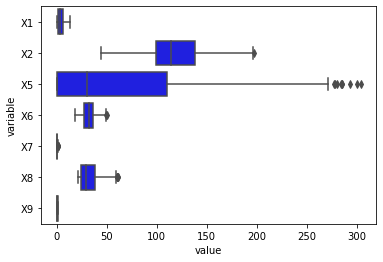

In [237]:
sns.boxplot(x="value", y="variable", color='blue',orient='h', data=pd.melt(df_baru))

plt.show()

Mayoritas data outlier sudah berhasil diatasi

- MinMaxScaler (Untuk melakukan normalisasi data)

In [238]:
def minmax_scaler(data):
  return((data-min(data))/(max(data)-min(data)))

In [239]:
def normalization(data, scaler):
    data_baru=[]
    for i in data.columns:
        data_baru.append(scaler(data[i]))
    df = pd.DataFrame(np.array(data_baru).T,columns=df_baru.columns)
    return df

In [240]:
df_norm = normalization(df_new,minmax_scaler)
df_norm

X1        X2        X5        X6        X7     X8   X9
0    0.230769  0.535948  0.773026  0.663522  0.546248  0.150  0.0
1    0.615385  0.359477  0.000000  0.540881  0.270506  0.725  0.0
2    0.538462  0.993464  0.000000  0.679245  0.325480  0.500  1.0
3    0.692308  0.490196  0.000000  0.339623  0.161431  0.200  1.0
4    0.846154  0.647059  0.480263  0.578616  0.153578  0.750  1.0
..        ...       ...       ...       ...       ...    ...  ...
405  0.307692  0.529412  0.401316  0.336478  0.930192  0.600  1.0
406  0.384615  0.431373  0.000000  0.245283  0.186736  0.225  0.0
407  0.153846  0.241830  0.250000  0.374214  0.409250  0.100  0.0
408  0.538462  0.986928  0.476974  0.216981  0.074171  0.850  1.0
409  0.461538  0.718954  0.634868  0.349057  0.664049  0.450  0.0

[410 rows x 7 columns]

Penyebaran data sudah menjadi berada di 0 hingga 1, itu menunjukkan bahwa distribusi data sudah normal

#### c. Pisahkan data menjadi training dan testing dengan perbandingan 75% data training

- Train test split

In [241]:
X = df_norm.drop(columns=['X9']).values
y = df_norm['X9'].values

Membagi data menjadi X_train, X_test, y_train dan y_test dengan jumlah train_size = 75% dan test_size = 25%

In [242]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

- Euclidean Distance (Untuk perhitungan metriks jarak)

In [243]:
#jarak euclidean
def euclidean_dist(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

- K Nearest Neighbor (KNN) untuk melakukan klasifikasi

In [244]:
def KNN_train(x):
    hitung_euclid=[]
  #hitung jarak euclidean dengan data x_train
    for x_train in X_train:
        hitung_euclid.append(euclidean_dist(x, x_train))
  
  #urutkan data dan ambil data sebanyak k
    k_urut = np.argsort(hitung_euclid)[: k]
  
  #mencocokkan setiap y_train dengan data dari k_urut
    k_labels = [] 
    for i in k_urut:
        k_labels.append(y_train[i])
  
  #melihat dan mengambil kelas yang paling banyak muncul dengan modus
    kelas = mode(k_labels) 
    kelas = kelas.mode[0]
    return kelas

In [245]:
#membuat prediksi dengan KNN
def KNN_predict(X_train, y_train, k, X_test):
    y_pred= []
    for x in X_test :
        y_pred.append(KNN_train(x))
    return np.array(y_pred)

#### d. Tentukan nilai k-optimal menggunakan elbow method (number of k values VS error/accuracy).

Penggunaan elbow method untuk mengetahui nilai k terbaik

In [246]:
accuration = []
for k in range(1,40):
    y_pred=KNN_predict(X_train, y_train, k, X_test)
    
    accuration_score = np.sum(np.equal(y_test, y_pred)) / len(y_test)
    accuration.append(accuration_score)

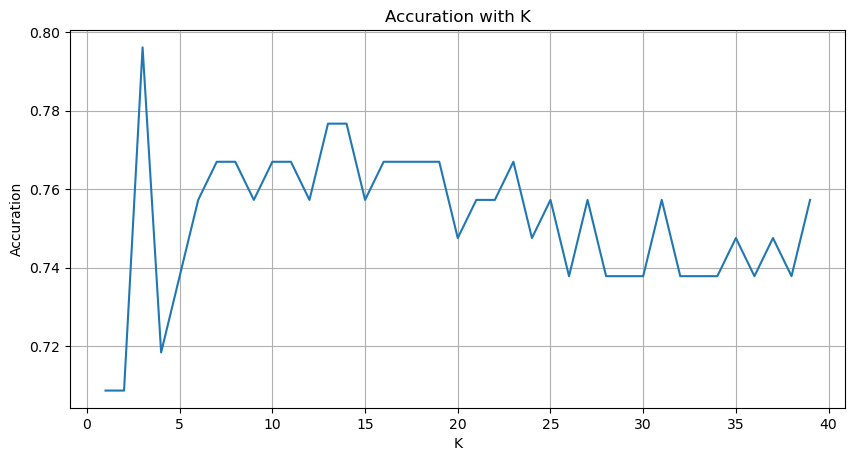

In [247]:
plt.figure(figsize=(10,5),dpi=100)
plt.plot(range(1,40),accuration)
plt.title('Accuration with K')
plt.ylabel('Accuration')
plt.xlabel("K")
plt.grid()

Dari plot di atas menunjukkan bahwa k = 3 adalah k paling optimal berdasarkan nilai akurasinya, sehingga selanjutnya akan dipilih k = 3

In [248]:
k=3
y_pred=KNN_predict(X_train, y_train, k, X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1.])

#### e. Evaluasi model KNN menggunakan accuracy, precision, dan recall

In [249]:
accuration  = np.sum(np.equal(y_test, y_pred)) / len(y_test)
print('Akurasi dari Model KNN dengan k = 4 :', accuration)
precision  = cm[1,1]/(cm[1,1]+cm[0,1])
print('Precision dari Model KNN dengan k = 4 :', precision)
recall   = cm[1,1]/(cm[1,1]+cm[1,0])
print('Recall dari Model KNN dengan k = 4 :', recall)
f1_score = 2*((precision*recall)/(precision+recall))
print('F1_Score dari Model KNN dengan k = 4 :', f1_score)

Akurasi dari Model KNN dengan k = 4 : 0.7961165048543689
Precision dari Model KNN dengan k = 4 : 0.76
Recall dari Model KNN dengan k = 4 : 0.5588235294117647
F1_Score dari Model KNN dengan k = 4 : 0.6440677966101696


#### f. Buatlah confusion matrix

In [250]:
#membuat fungsi confusion matrix
def confussion_matrix(y_test, y_pred):
    #mengambil kelas atau label dari data aktual
    label_test = np.unique(y_test)

    #menginisialisasi matrix zero atau nol
    matrix = np.zeros((len(label_test), len(label_test)))

    #membuat perulangan for untuk indeks i dan j
    for i in range(len(label_test)):
        for j in range(len(label_test)):
           #membandingkan nilai aktual (y_test) dan prediksi(y_pred)
           matrix[i, j] = np.sum((y_test == label_test[i]) & (y_pred == label_test[j]))
    return matrix

In [251]:
cm = confussion_matrix(y_test,y_pred)
print(cm)

[[63.  6.]
 [15. 19.]]


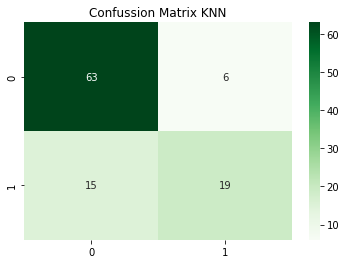

In [252]:
sns.heatmap(cm, annot=True, cmap='Greens').set(title='Confussion Matrix KNN')
plt.show()

#### Kesimpulan

K Nearest Neighbor atau KNN sudah berhasil melakukan klasifikasi dari data, dan dengan bantuan Elbow Method, berhasil didapatkan nilai k optimal atau terbaik pada KNN yang menghasilkan akurasi sebesar 0.796 atau 79,6%.

### 2. [LO 3, 25 poin] Ria merupakan seorang bioinformatician yang bekerja di bidang Kesehatan. Ria mengambil beberapa sample PCR untuk menentukan kelainan DNA dari sebuah penyakit yang tidak diketahui. Hasil pengambilan data tersebut kemudian diekstraksi dan disimpan ke dalam “DNA.csv”. Supervisor Ria meminta dia untuk membuat program berdasarkan algoritma berikut:

- Import Library & Dataset

In [253]:
import pandas as pd
import numpy as np
import random as rd
import seaborn
import matplotlib.pyplot as plt

In [254]:
df = pd.read_csv("DNA.csv")
df.head()

num_of_atoms  num_of_heavy_atoms
0            14                   6
1            11                   5
2            15                   6
3            21                   7
4            20                   7

- Memilih baris dan kolom berdasarkan posisi menggunakan iloc

In [255]:
X = df.iloc[:, [0, 1]].values
X

array([[14,  6],
       [11,  5],
       [15,  6],
       ...,
       [18,  6],
       [17,  6],
       [ 7,  5]], dtype=int64)

- Membuat plot viasualisasi data untuk kategori unclustered data menggunakan scatter

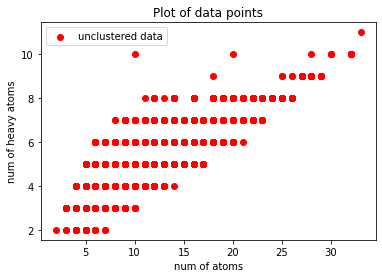

In [256]:
plt.scatter(X[:, 0], X[:, 1], c='red', label='unclustered data')
plt.xlabel('num of atoms')
plt.ylabel('num of heavy atoms')
plt.legend()
plt.title('Plot of data points')
plt.show()

In [257]:
class Kmeans:
    #Inisialisasi variabel
    def __init__(self,X,K):
        self.X=X
        self.Output={}
        self.Centroids=np.array([]).reshape(self.X.shape[1],0)
        self.K=K
        self.m=self.X.shape[0]

    def kmeanspp(self,X,K):
        i=rd.randint(0,X.shape[0])
        Centroid_temp=np.array([X[i]])
        for k in range(1,K):
            D=np.array([]) 
            for x in X:
                D=np.append(D,np.min(np.sum((x-Centroid_temp)**2)))
            prob=D/np.sum(D)
            cummulative_prob=np.cumsum(prob)
            r=rd.random()
            i=0
            for j,p in enumerate(cummulative_prob):
                if r<p:
                    i=j
                    break
            Centroid_temp=np.append(Centroid_temp,[X[i]],axis=0)
        return Centroid_temp.T
    
    def fit(self,n_iter):
        #2. Inisialisasi Centroid secara random
        self.Centroids=self.kmeanspp(self.X,self.K)
        
        #3. a) Menghitung jarak Euclidean dari centroid dan menentukan cluster 
        for n in range(n_iter):
            EuclidianDistance=np.array([]).reshape(self.m,0)
            for k in range(self.K):
                tempDist=np.sum((self.X-self.Centroids[:,k])**2,axis=1)
                EuclidianDistance=np.c_[EuclidianDistance,tempDist]
            C=np.argmin(EuclidianDistance,axis=1)+1

        #3. b) Adjust centroid pada tiap cluster berdasarkan rata-rata data point pada tiap cluster yang didapatkan dari step 2a. 
            Y={}
            for k in range(self.K):
                Y[k+1]=np.array([]).reshape(2,0)
            for i in range(self.m):
                Y[C[i]]=np.c_[Y[C[i]],self.X[i]]
        
            for k in range(self.K):
                Y[k+1]=Y[k+1].T
            for k in range(self.K):
                self.Centroids[:,k]=np.mean(Y[k+1],axis=0)
                
            self.Output=Y
            
    
    def predict(self):
        return self.Output,self.Centroids.T
    
    def WCSS(self):
        wcss=0
        for k in range(self.K):
            wcss+=np.sum((self.Output[k+1]-self.Centroids[:,k])**2)
        return wcss

In [258]:
n_iter=100

In [259]:
WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)

C:\Users\chery\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\chery\anaconda3\lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


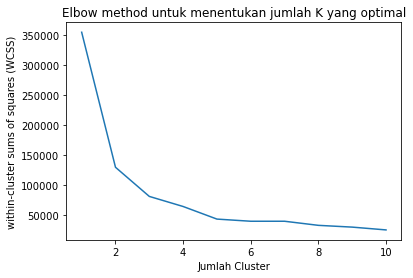

In [260]:
#1. Penentuan nilai k
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Jumlah Cluster')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method untuk menentukan jumlah K yang optimal')
plt.show()

Dari Elbow diatas, dapat terlihat bahwa jumlah K yang optimal adalah 3

In [261]:
K = 3
kmeans = Kmeans(X,K)
kmeans.fit(n_iter)
Output, Centroids = kmeans.predict()

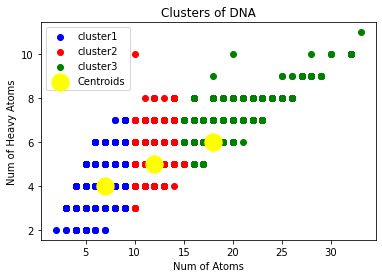

In [262]:
color=['blue','red','green','cyan']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[:,0],Centroids[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of DNA')
plt.xlabel('Num of Atoms')
plt.ylabel('Num of Heavy Atoms')
plt.legend()
plt.show()

Dapat dilihat pada data tersebut bahwa terdapat 3 clusters dari DNA. DImana masing masing cluster memiliki titik centroids yang berbeda-beda

- Dilakukan komparasi terhadap Sklearn

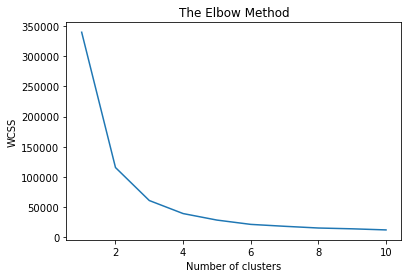

In [263]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [264]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'random', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

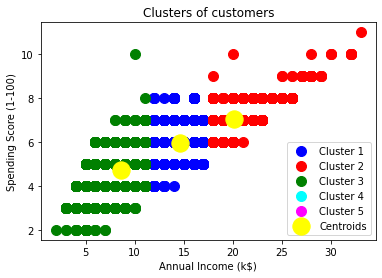

In [265]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Dapat dilihat pada data tersebut bahwa terdapat 3 clusters dari DNA. DImana masing masing cluster memiliki titik centroids yang berbeda-beda

### 3. Terdapat sebuah data citra topeng di Indonesia yang terdiri atas 5 topeng Indonesia yang terkenal dengan attribute sebanyak 200. Hasil dari proses tersebut disimpan dengan nama “experiment.csv”. Kalian diminta untuk membuat analisis dengan beberapa ketentuan sebagai berikut:

- Import Library & Dataset

In [266]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [267]:
df = pd.read_csv("experiment.csv", sep=',')
df.head()

F1   F2        F3        F4   F5        F6        F7        F8  \
0  0.006711  0.0  0.013423  0.006711  0.0  0.006711  0.006711  0.020134   
1  0.000000  0.0  0.000000  0.007246  0.0  0.000000  0.000000  0.021739   
2  0.011696  0.0  0.005848  0.000000  0.0  0.005848  0.000000  0.035088   
3  0.000000  0.0  0.020833  0.000000  0.0  0.000000  0.010417  0.000000   
4  0.000000  0.0  0.034483  0.000000  0.0  0.000000  0.000000  0.000000   

         F9       F10  ...      F192      F193      F194      F195      F196  \
0  0.020134  0.000000  ...  0.013423  0.000000  0.006711  0.013423  0.020134   
1  0.014493  0.000000  ...  0.007246  0.007246  0.000000  0.000000  0.014493   
2  0.017544  0.017544  ...  0.005848  0.000000  0.005848  0.011696  0.035088   
3  0.020833  0.000000  ...  0.010417  0.000000  0.000000  0.041667  0.000000   
4  0.034483  0.000000  ...  0.017241  0.000000  0.000000  0.068966  0.000000   

       F197  F198      F199  F200  Class  
0  0.006711   0.0  0.006711   0.0      1  
1  0.000000   0.0  0.007246   0.0      1  
2  0.005848   0.0  0.000000   0.0      1  
3  0.000000   0.0  0.000000   0.0      1  
4  0.000000   0.0  0.000000   0.0      1  

[5 rows x 201 columns]

#### a. [LO 1 & LO 2, 10 poin] Buatlah Visualisasi terhadap data di atas dan jelaskan mengenai hasil dari visualisasi data tersebut.

In [268]:
df_kel1 = df[["F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "Class"]]
df_kel2 = df[["F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "Class"]]
df_kel3 = df[["F21", "F22", "F23", "F24", "F25", "F26", "F27", "F28", "F29", "F30", "Class"]]
df_kel4 = df[["F31", "F32", "F33", "F34", "F35", "F36", "F37", "F38", "F39", "F40", "Class"]]
df_kel5 = df[["F41", "F42", "F43", "F44", "F45", "F46", "F47", "F48", "F49", "F50", "Class"]]

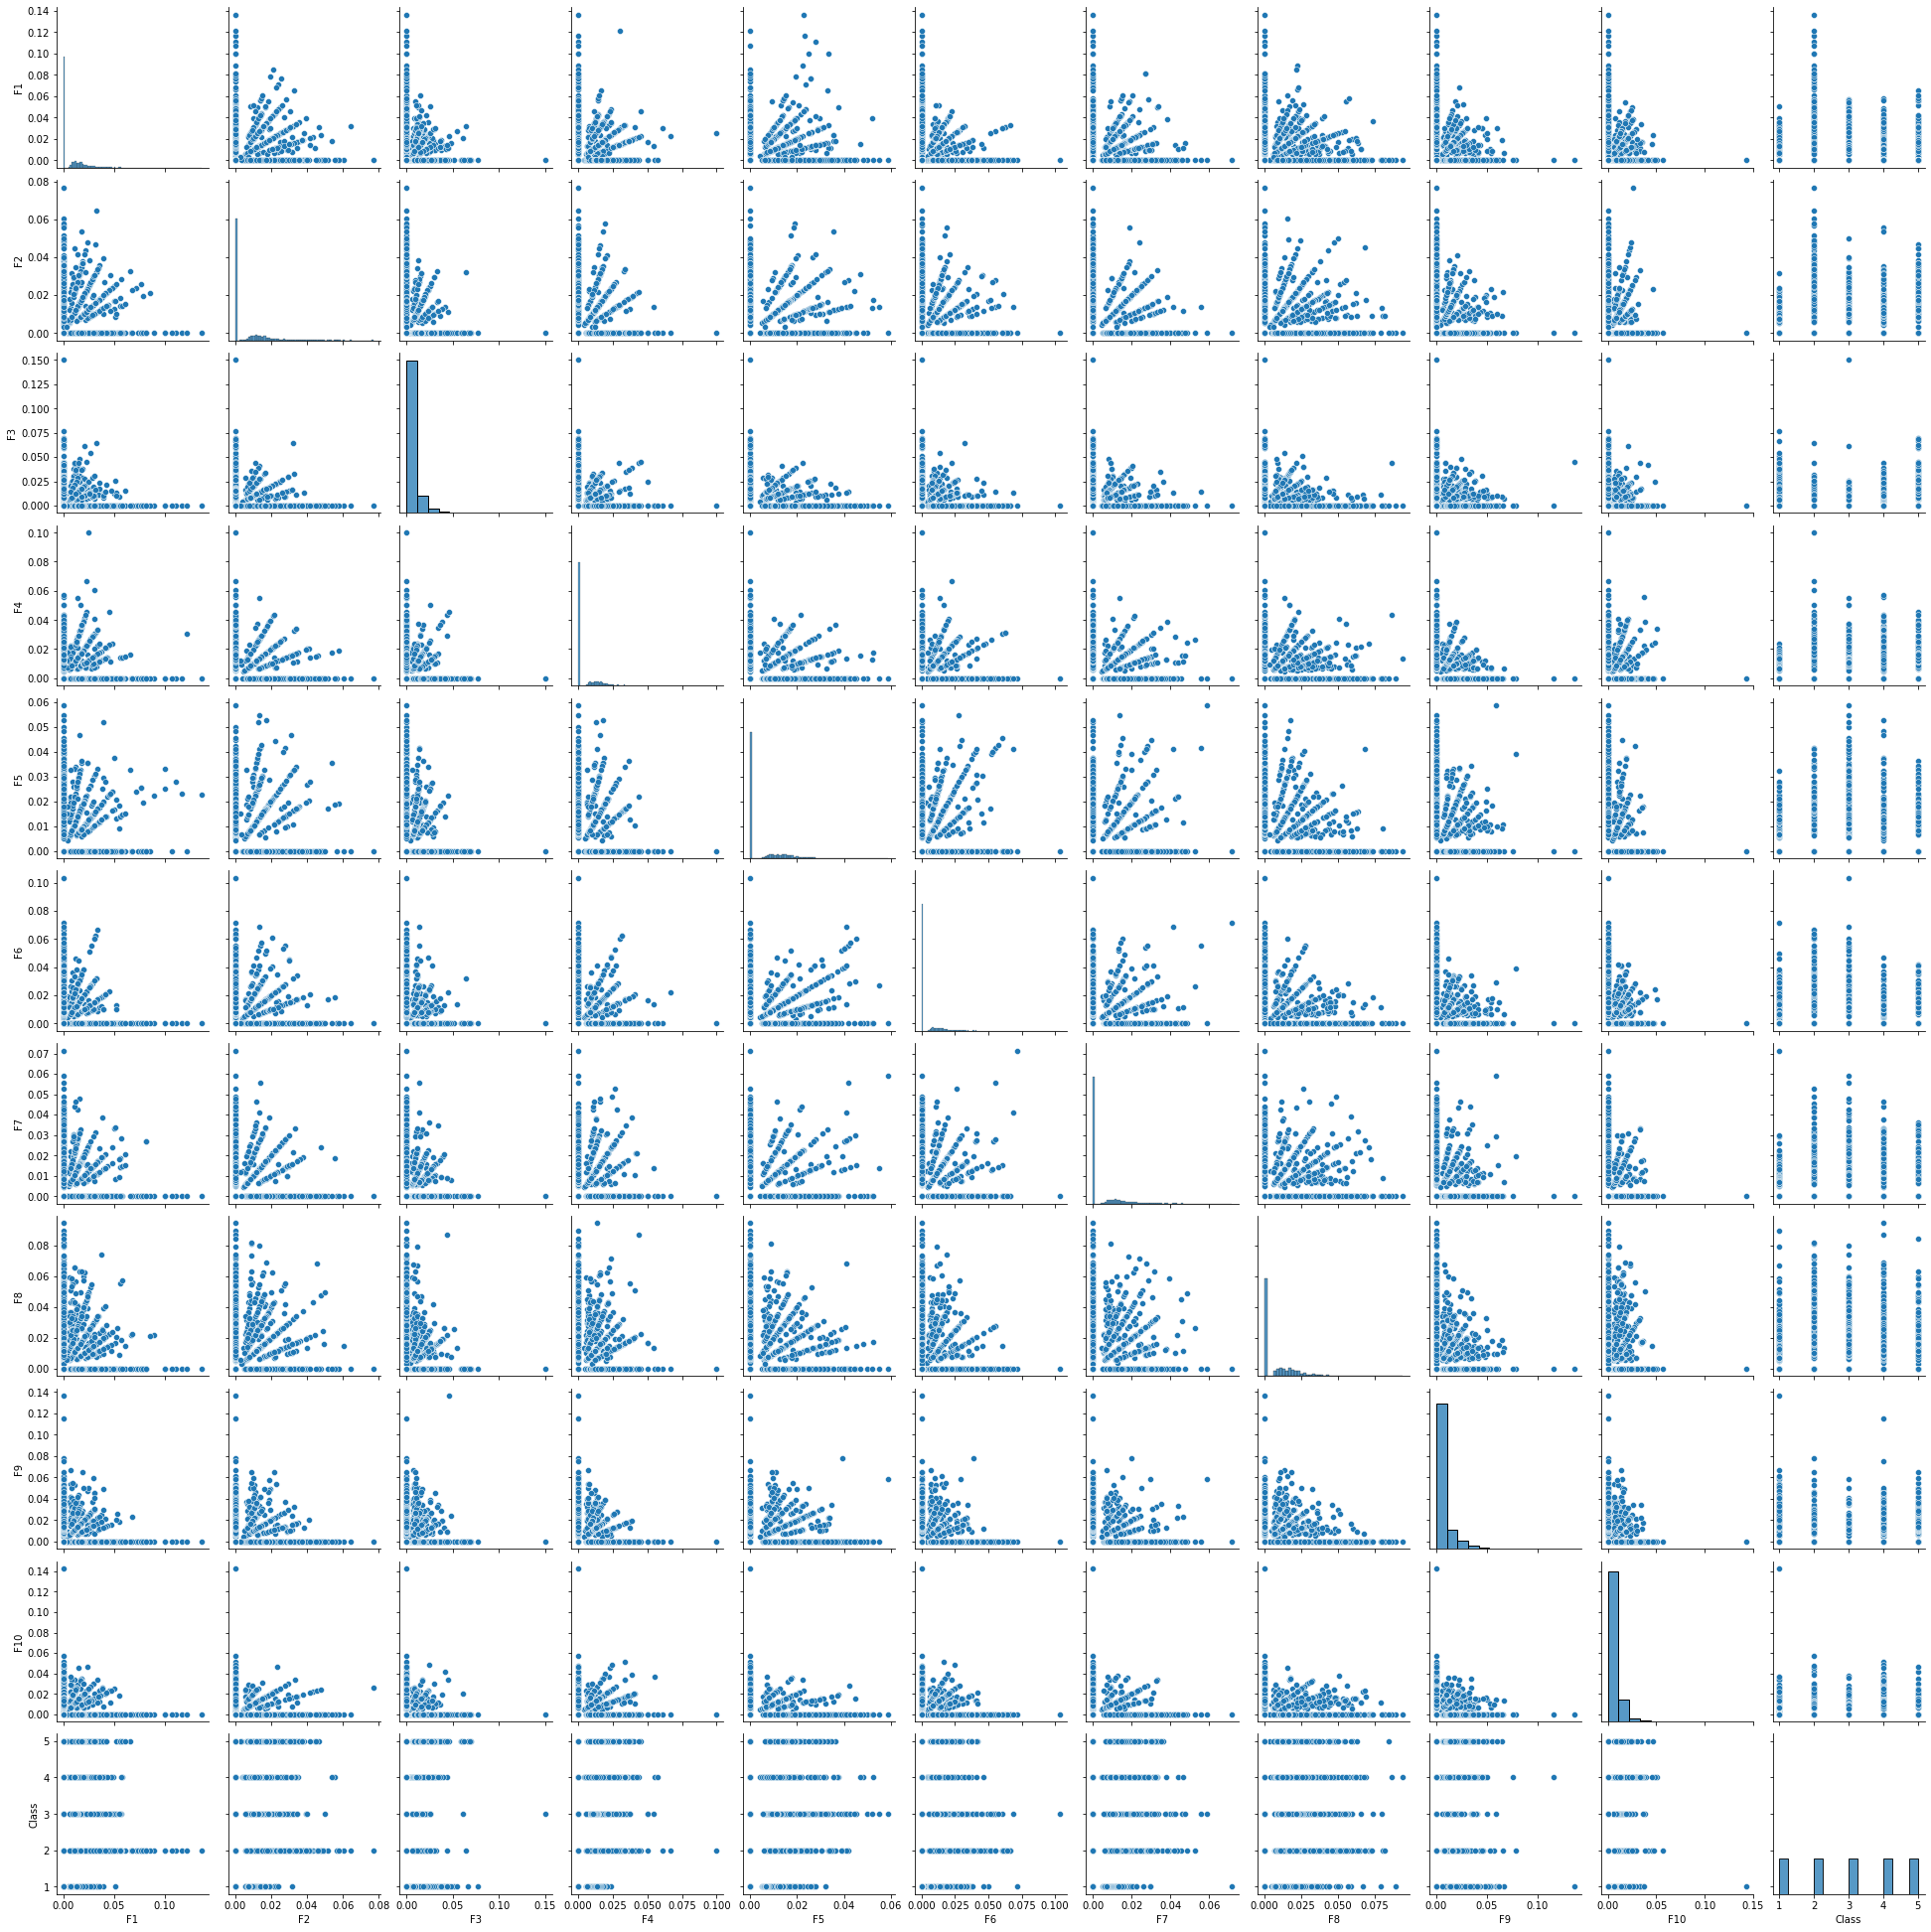

In [269]:
sns.pairplot(df_kel1)

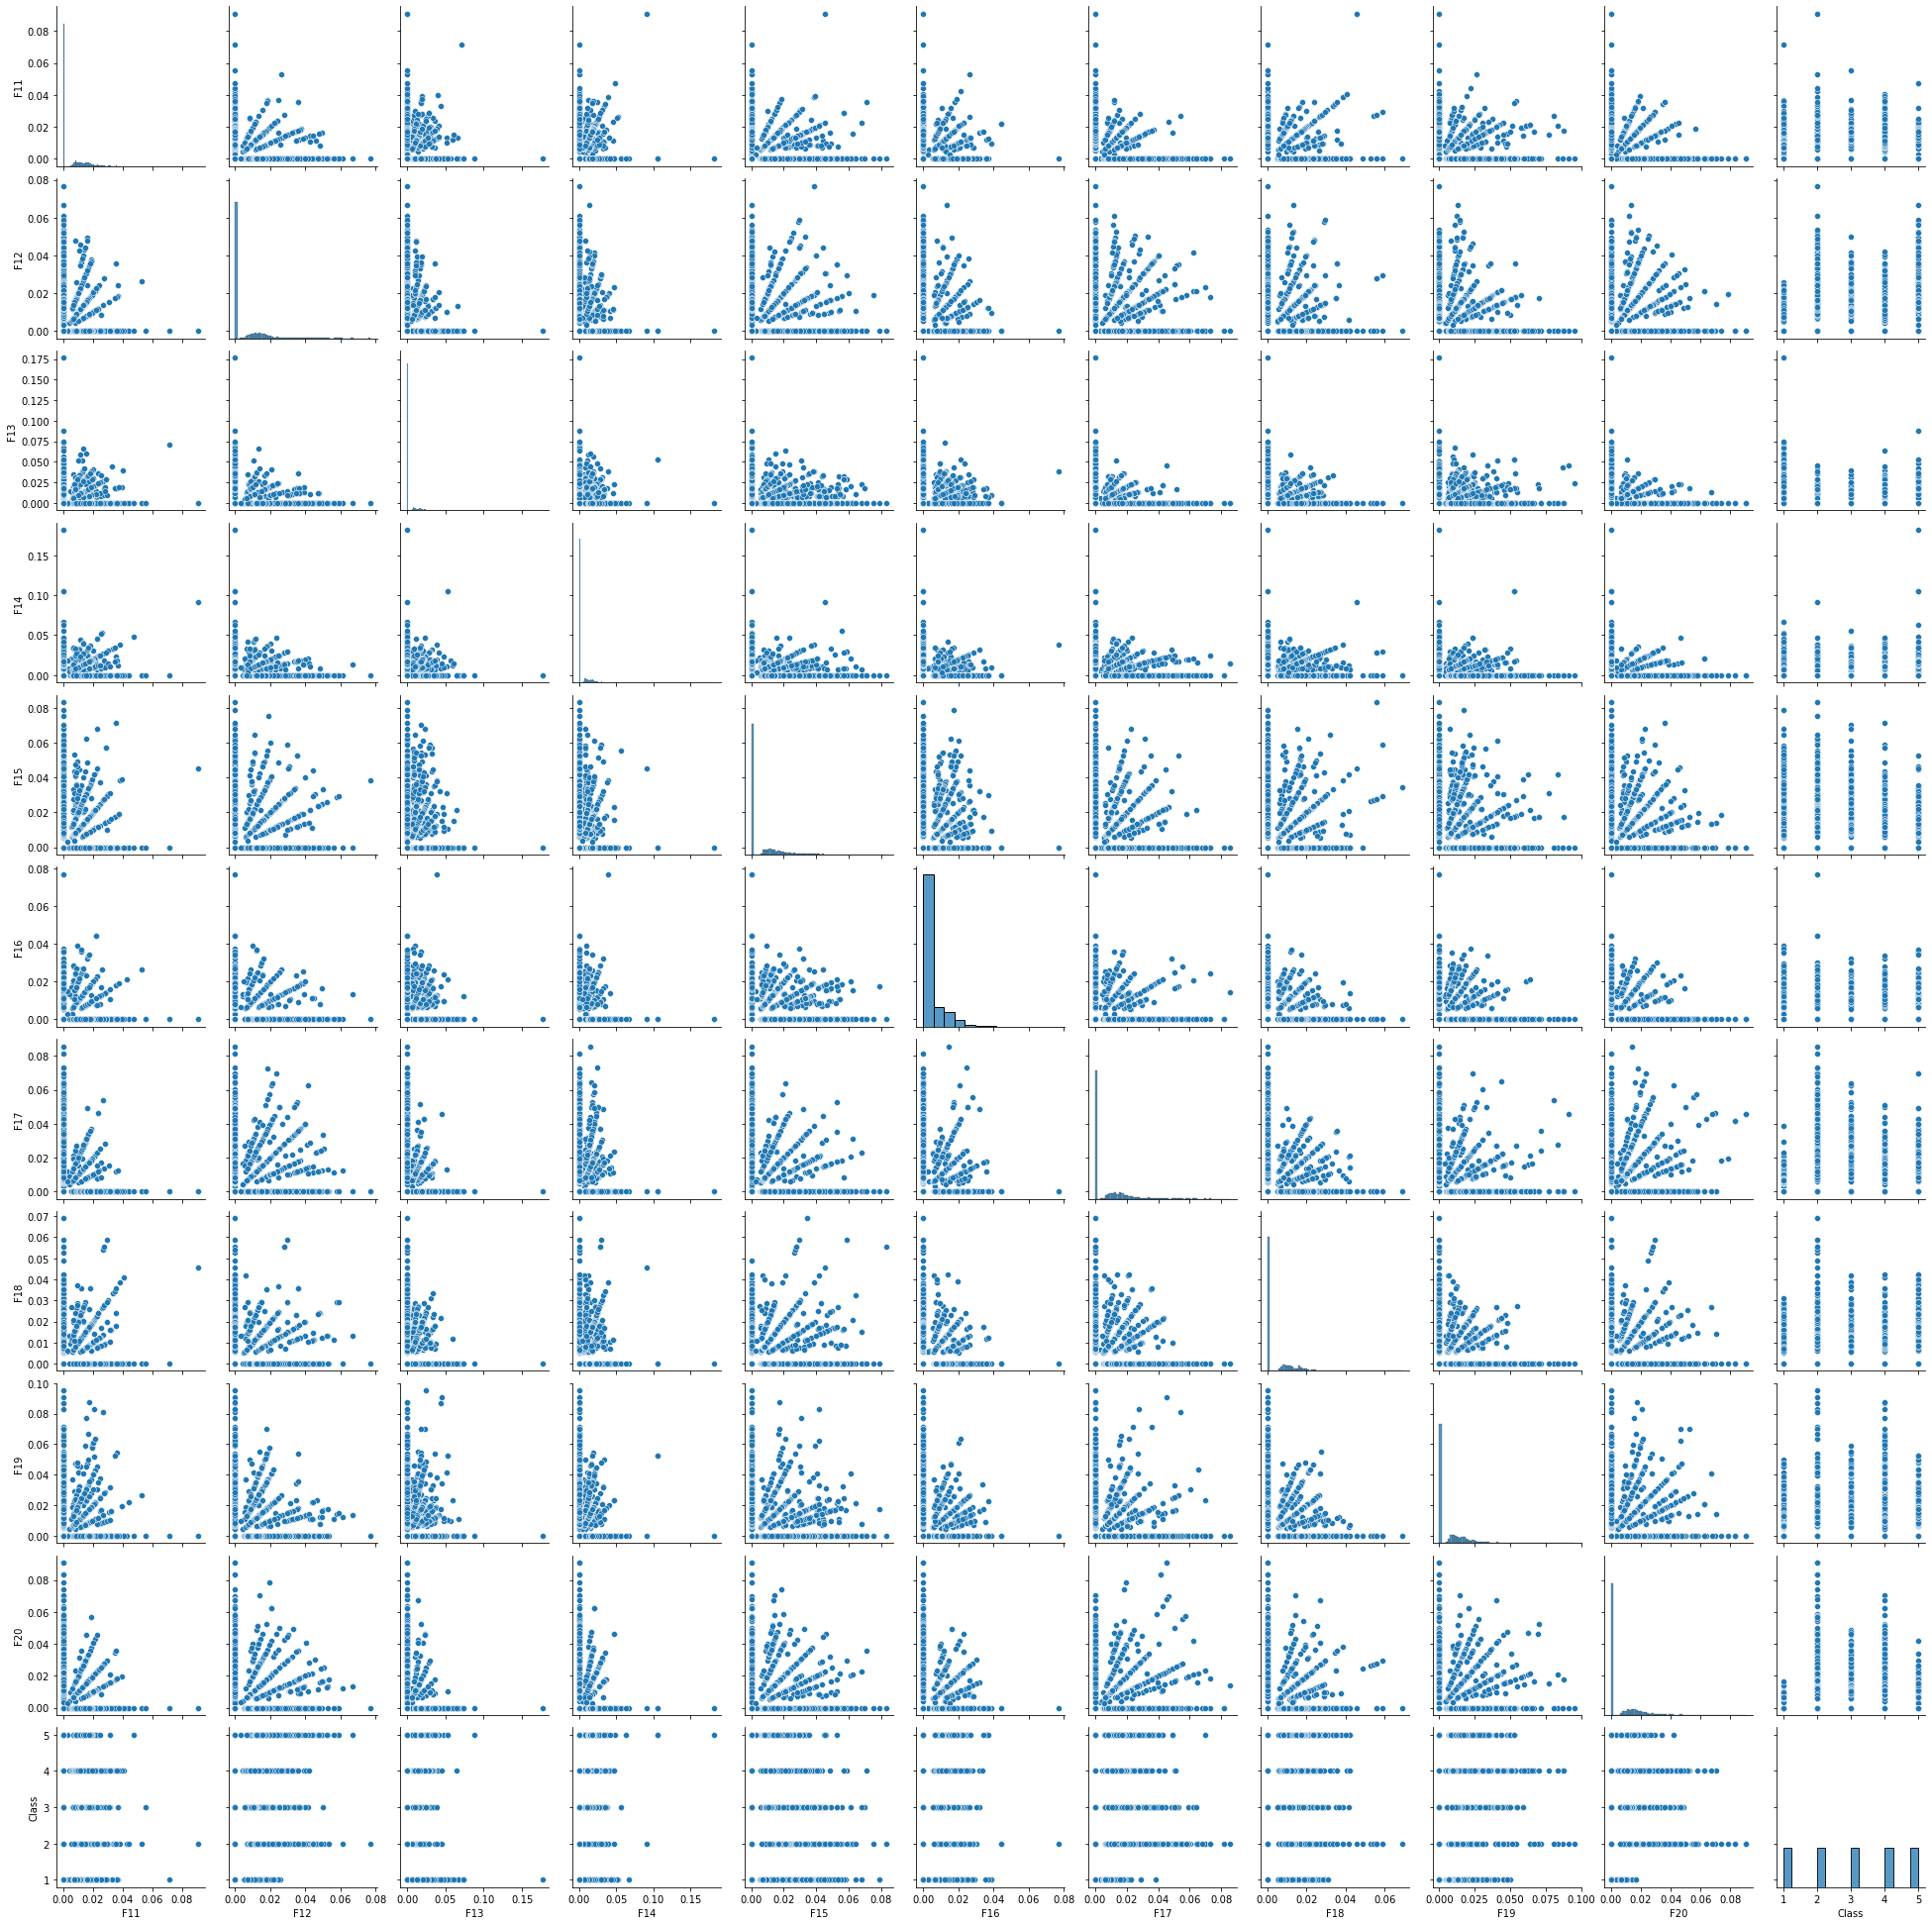

In [270]:
sns.pairplot(df_kel2)

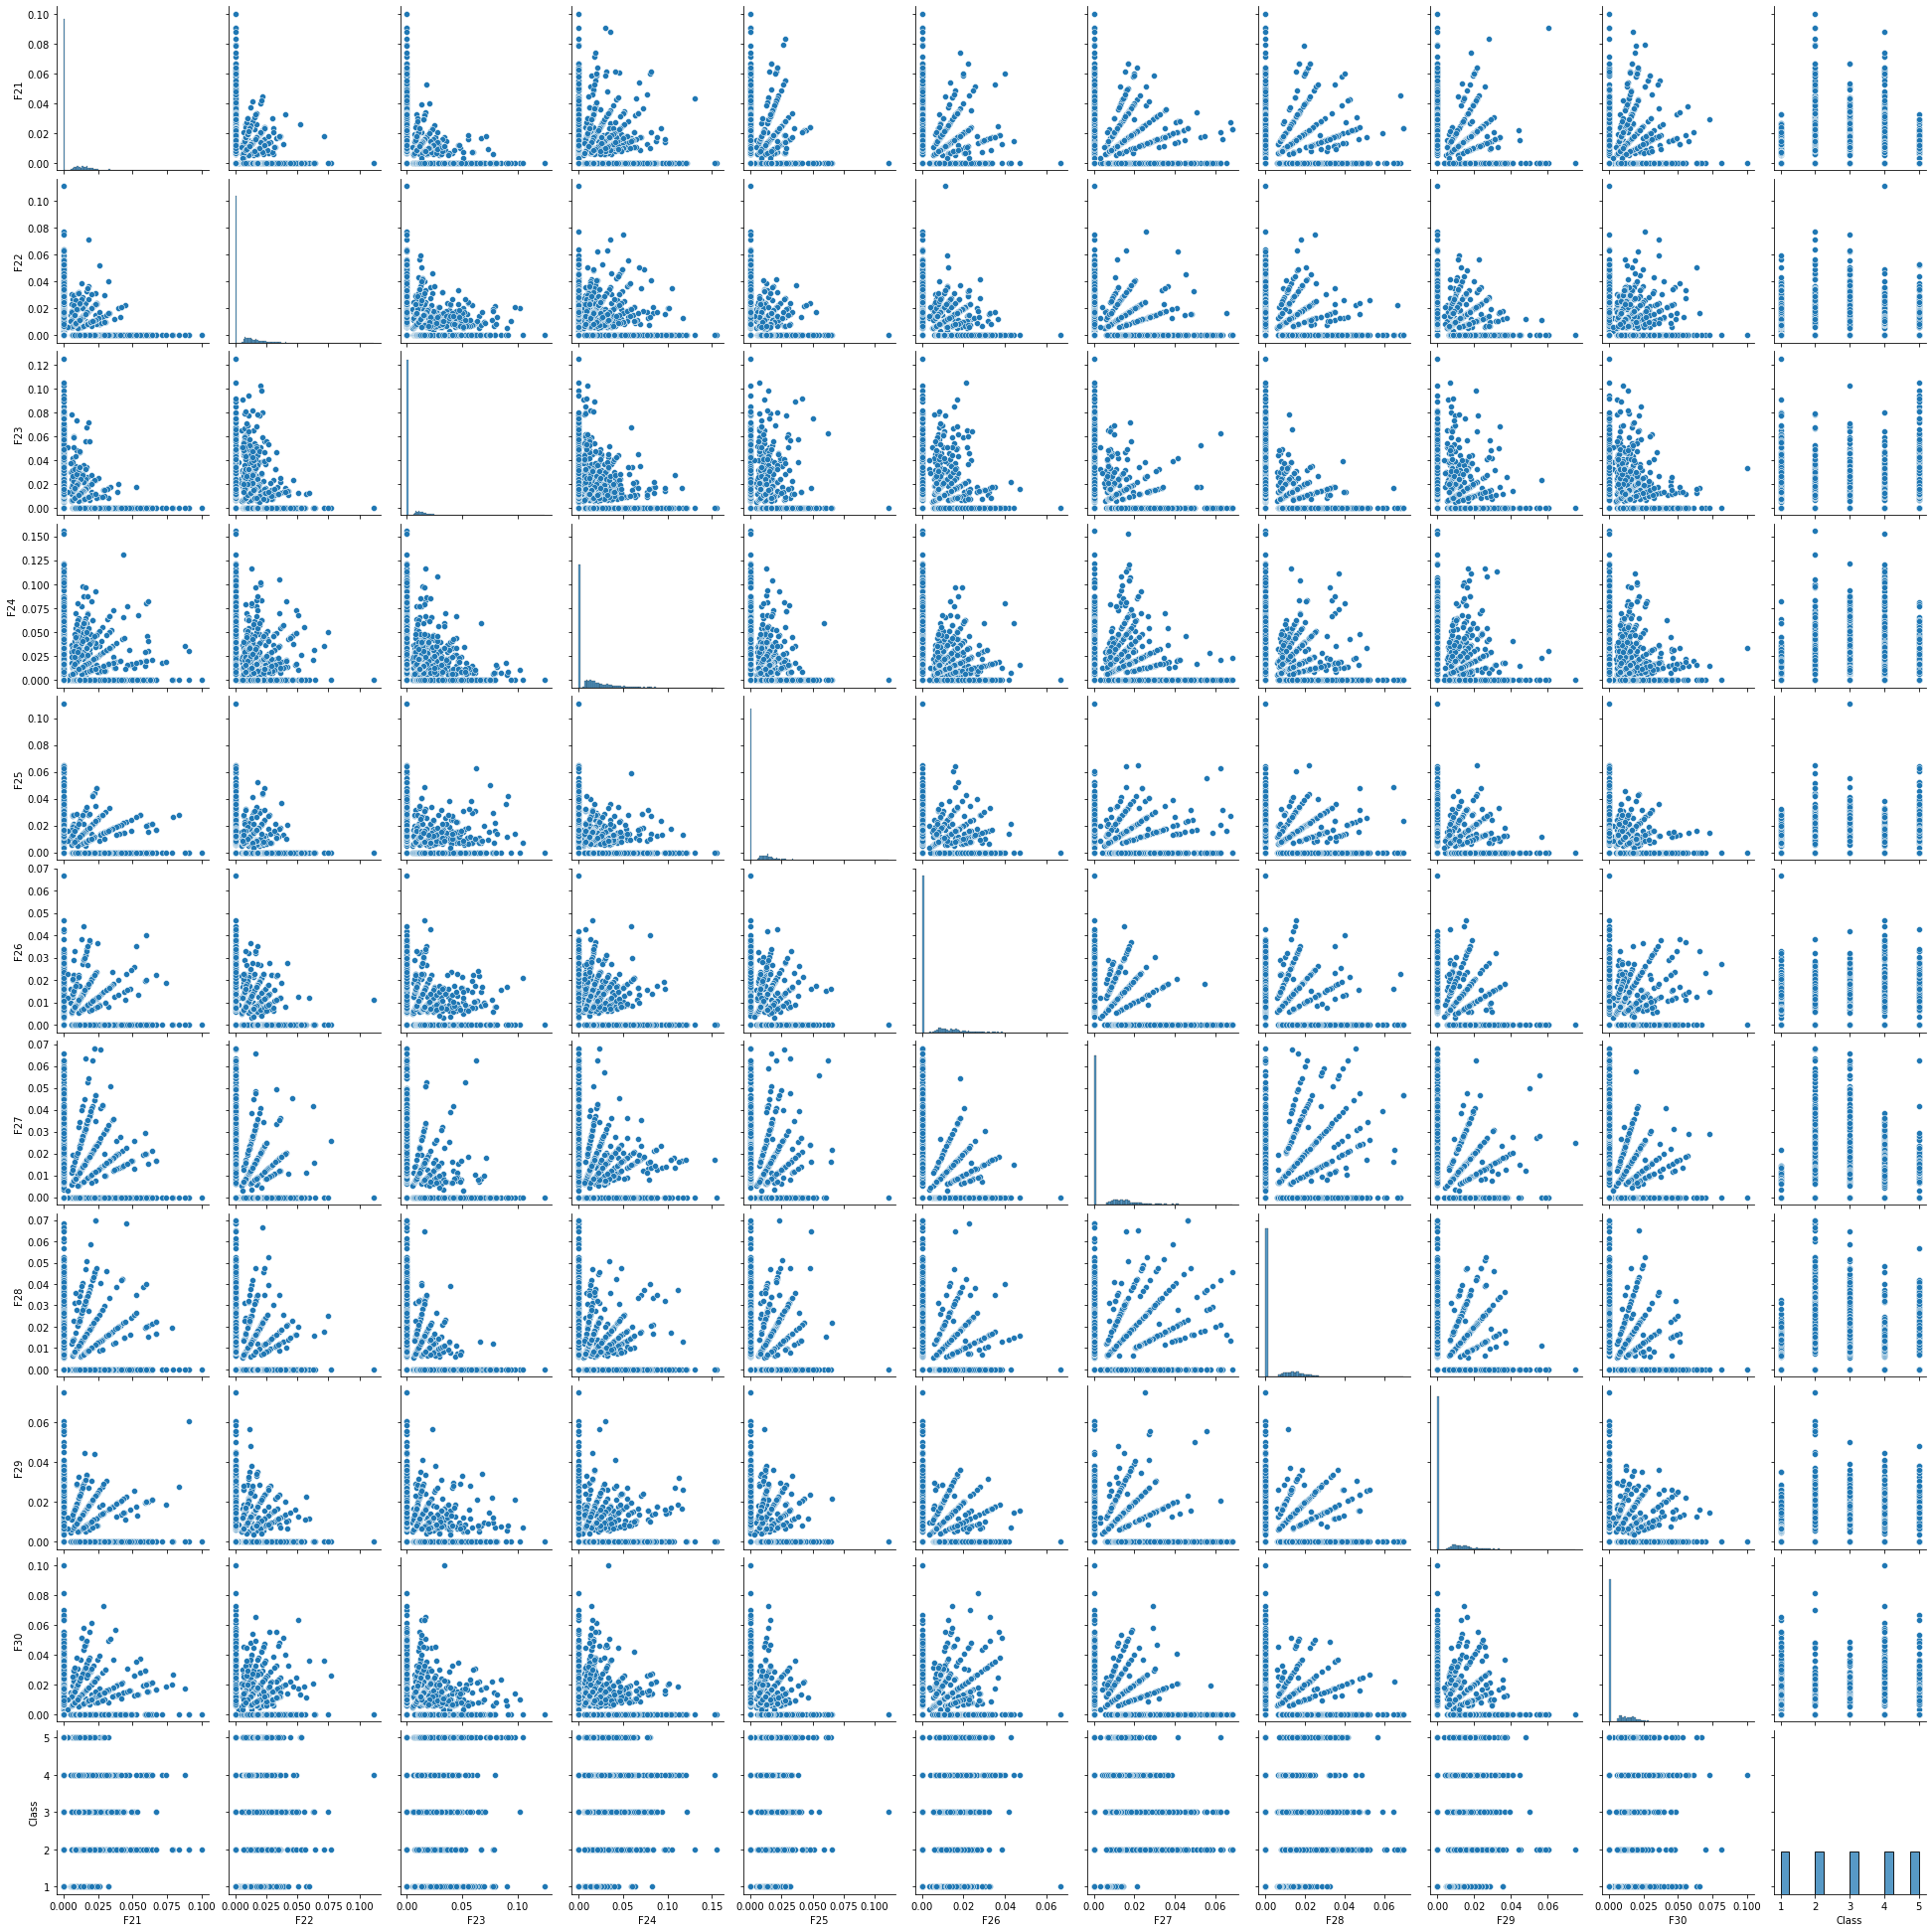

In [271]:
sns.pairplot(df_kel3)

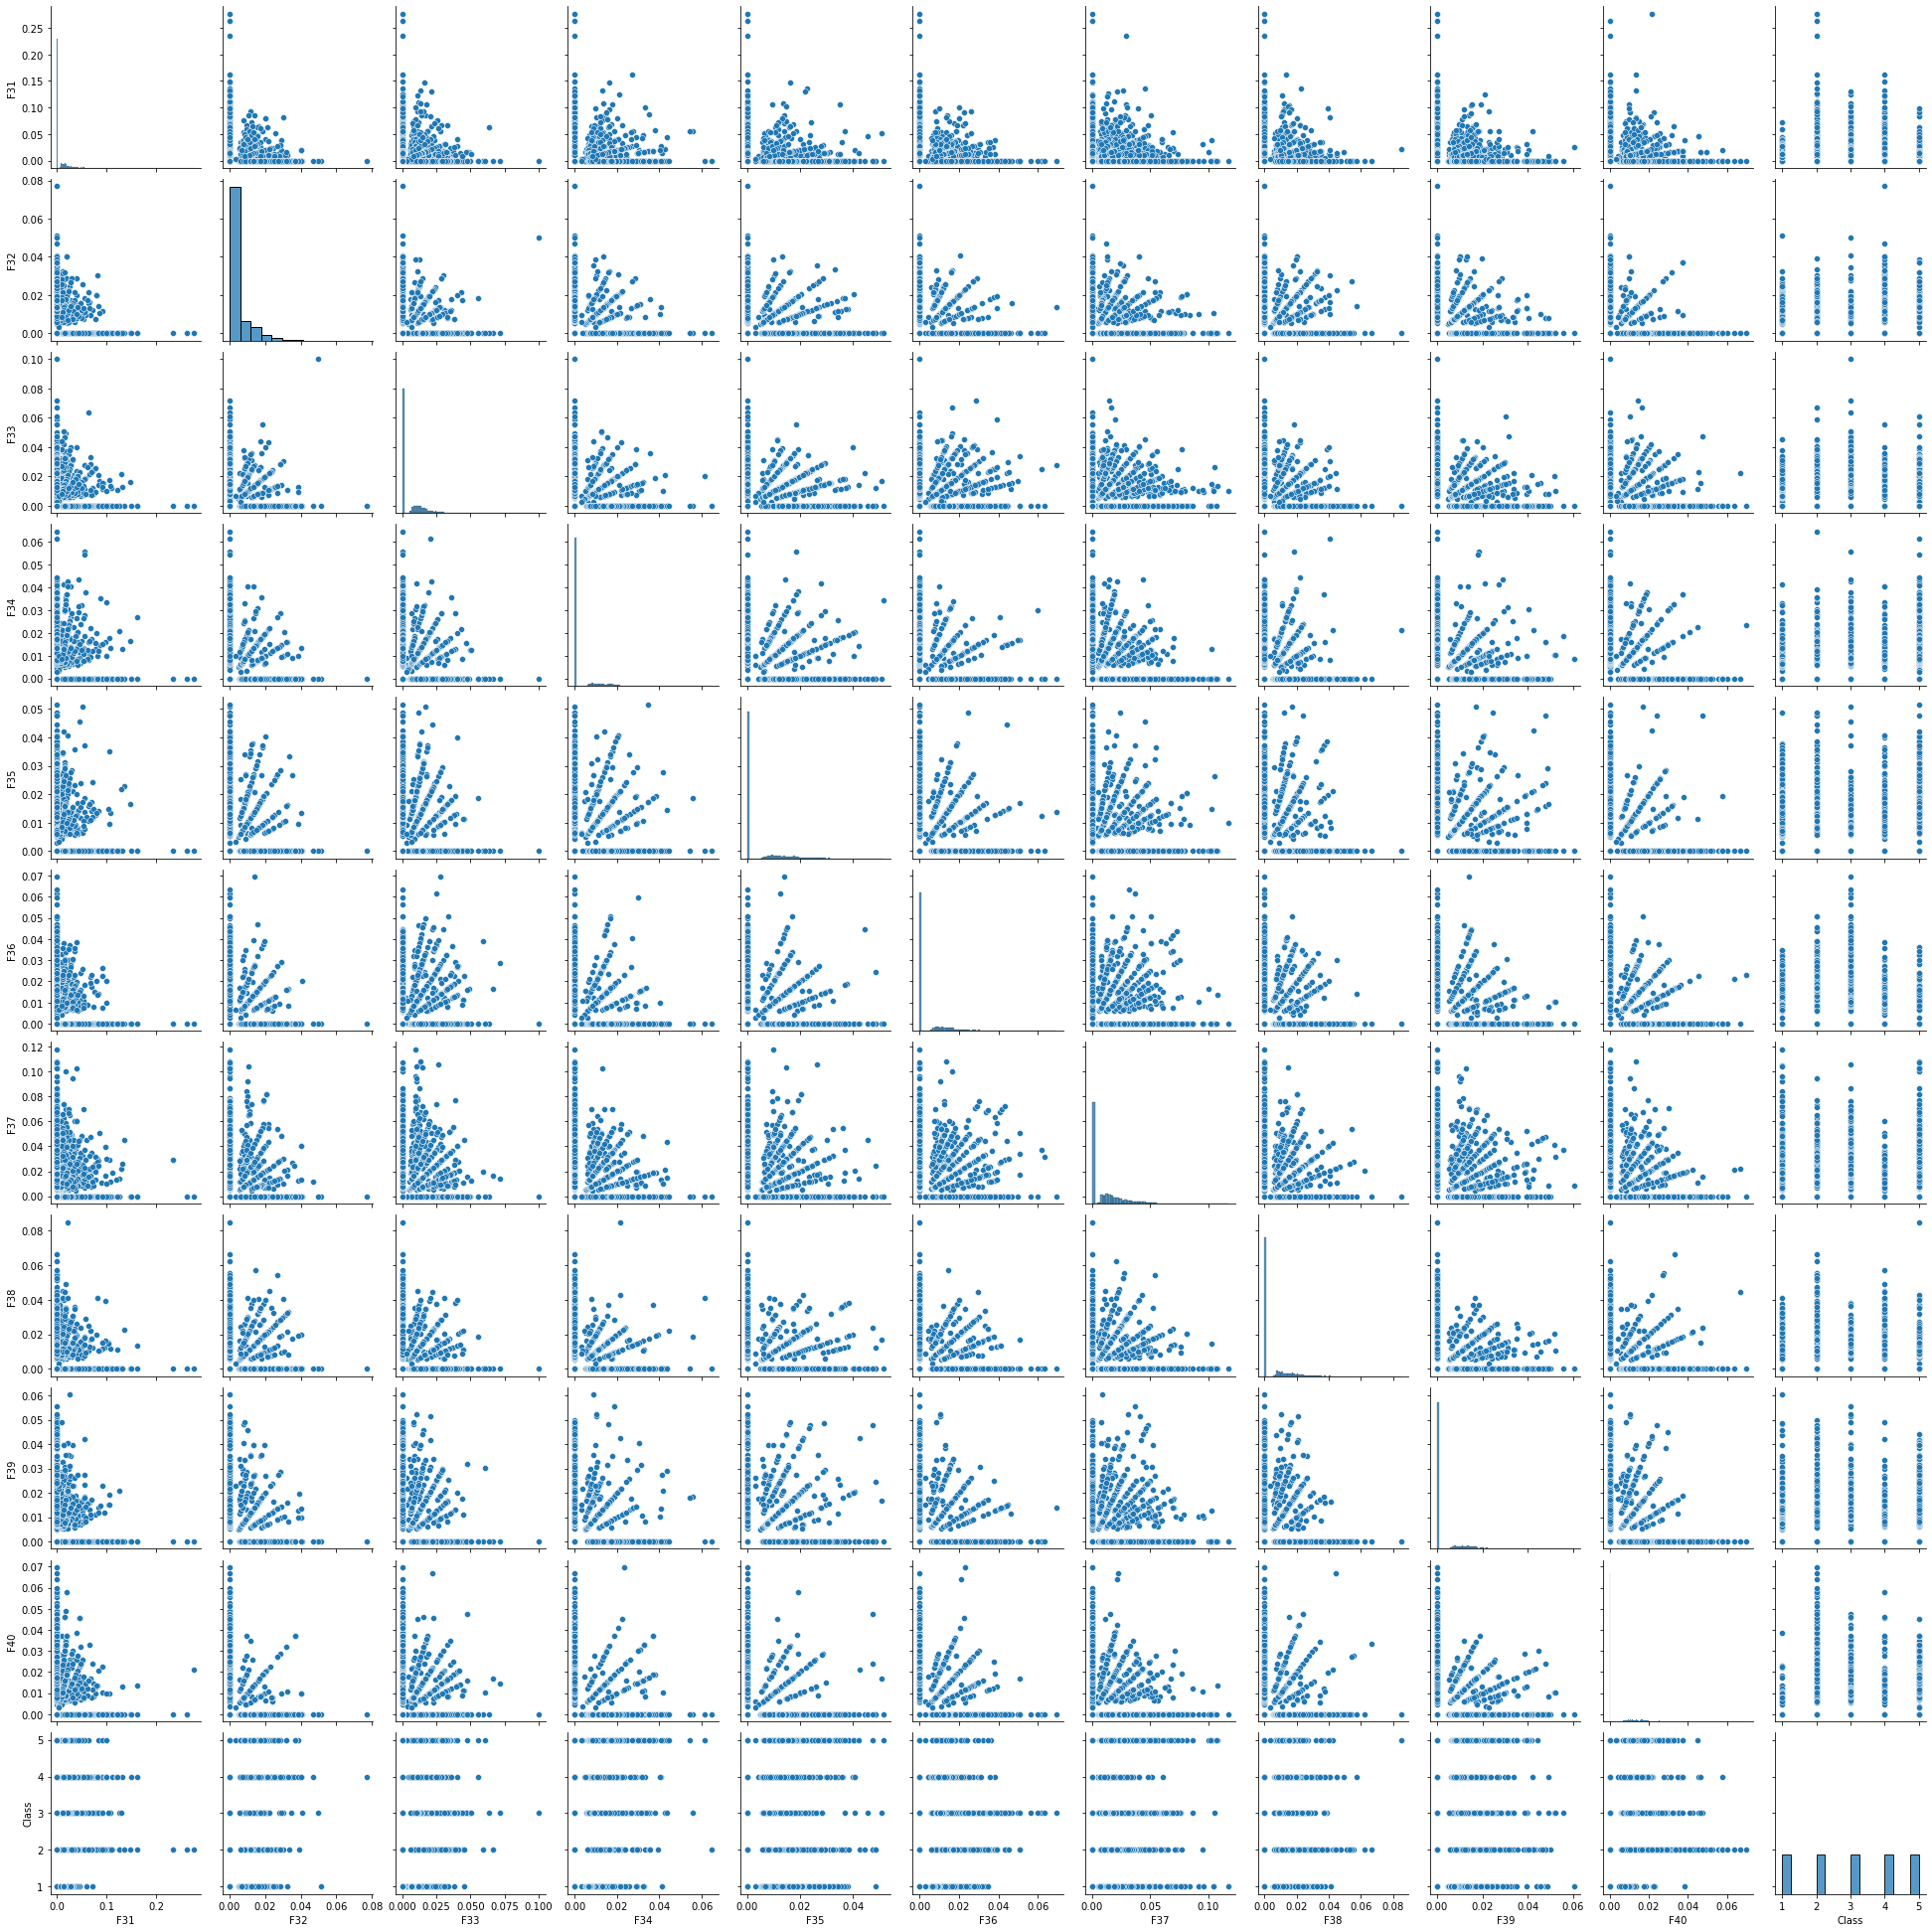

In [272]:
sns.pairplot(df_kel4)

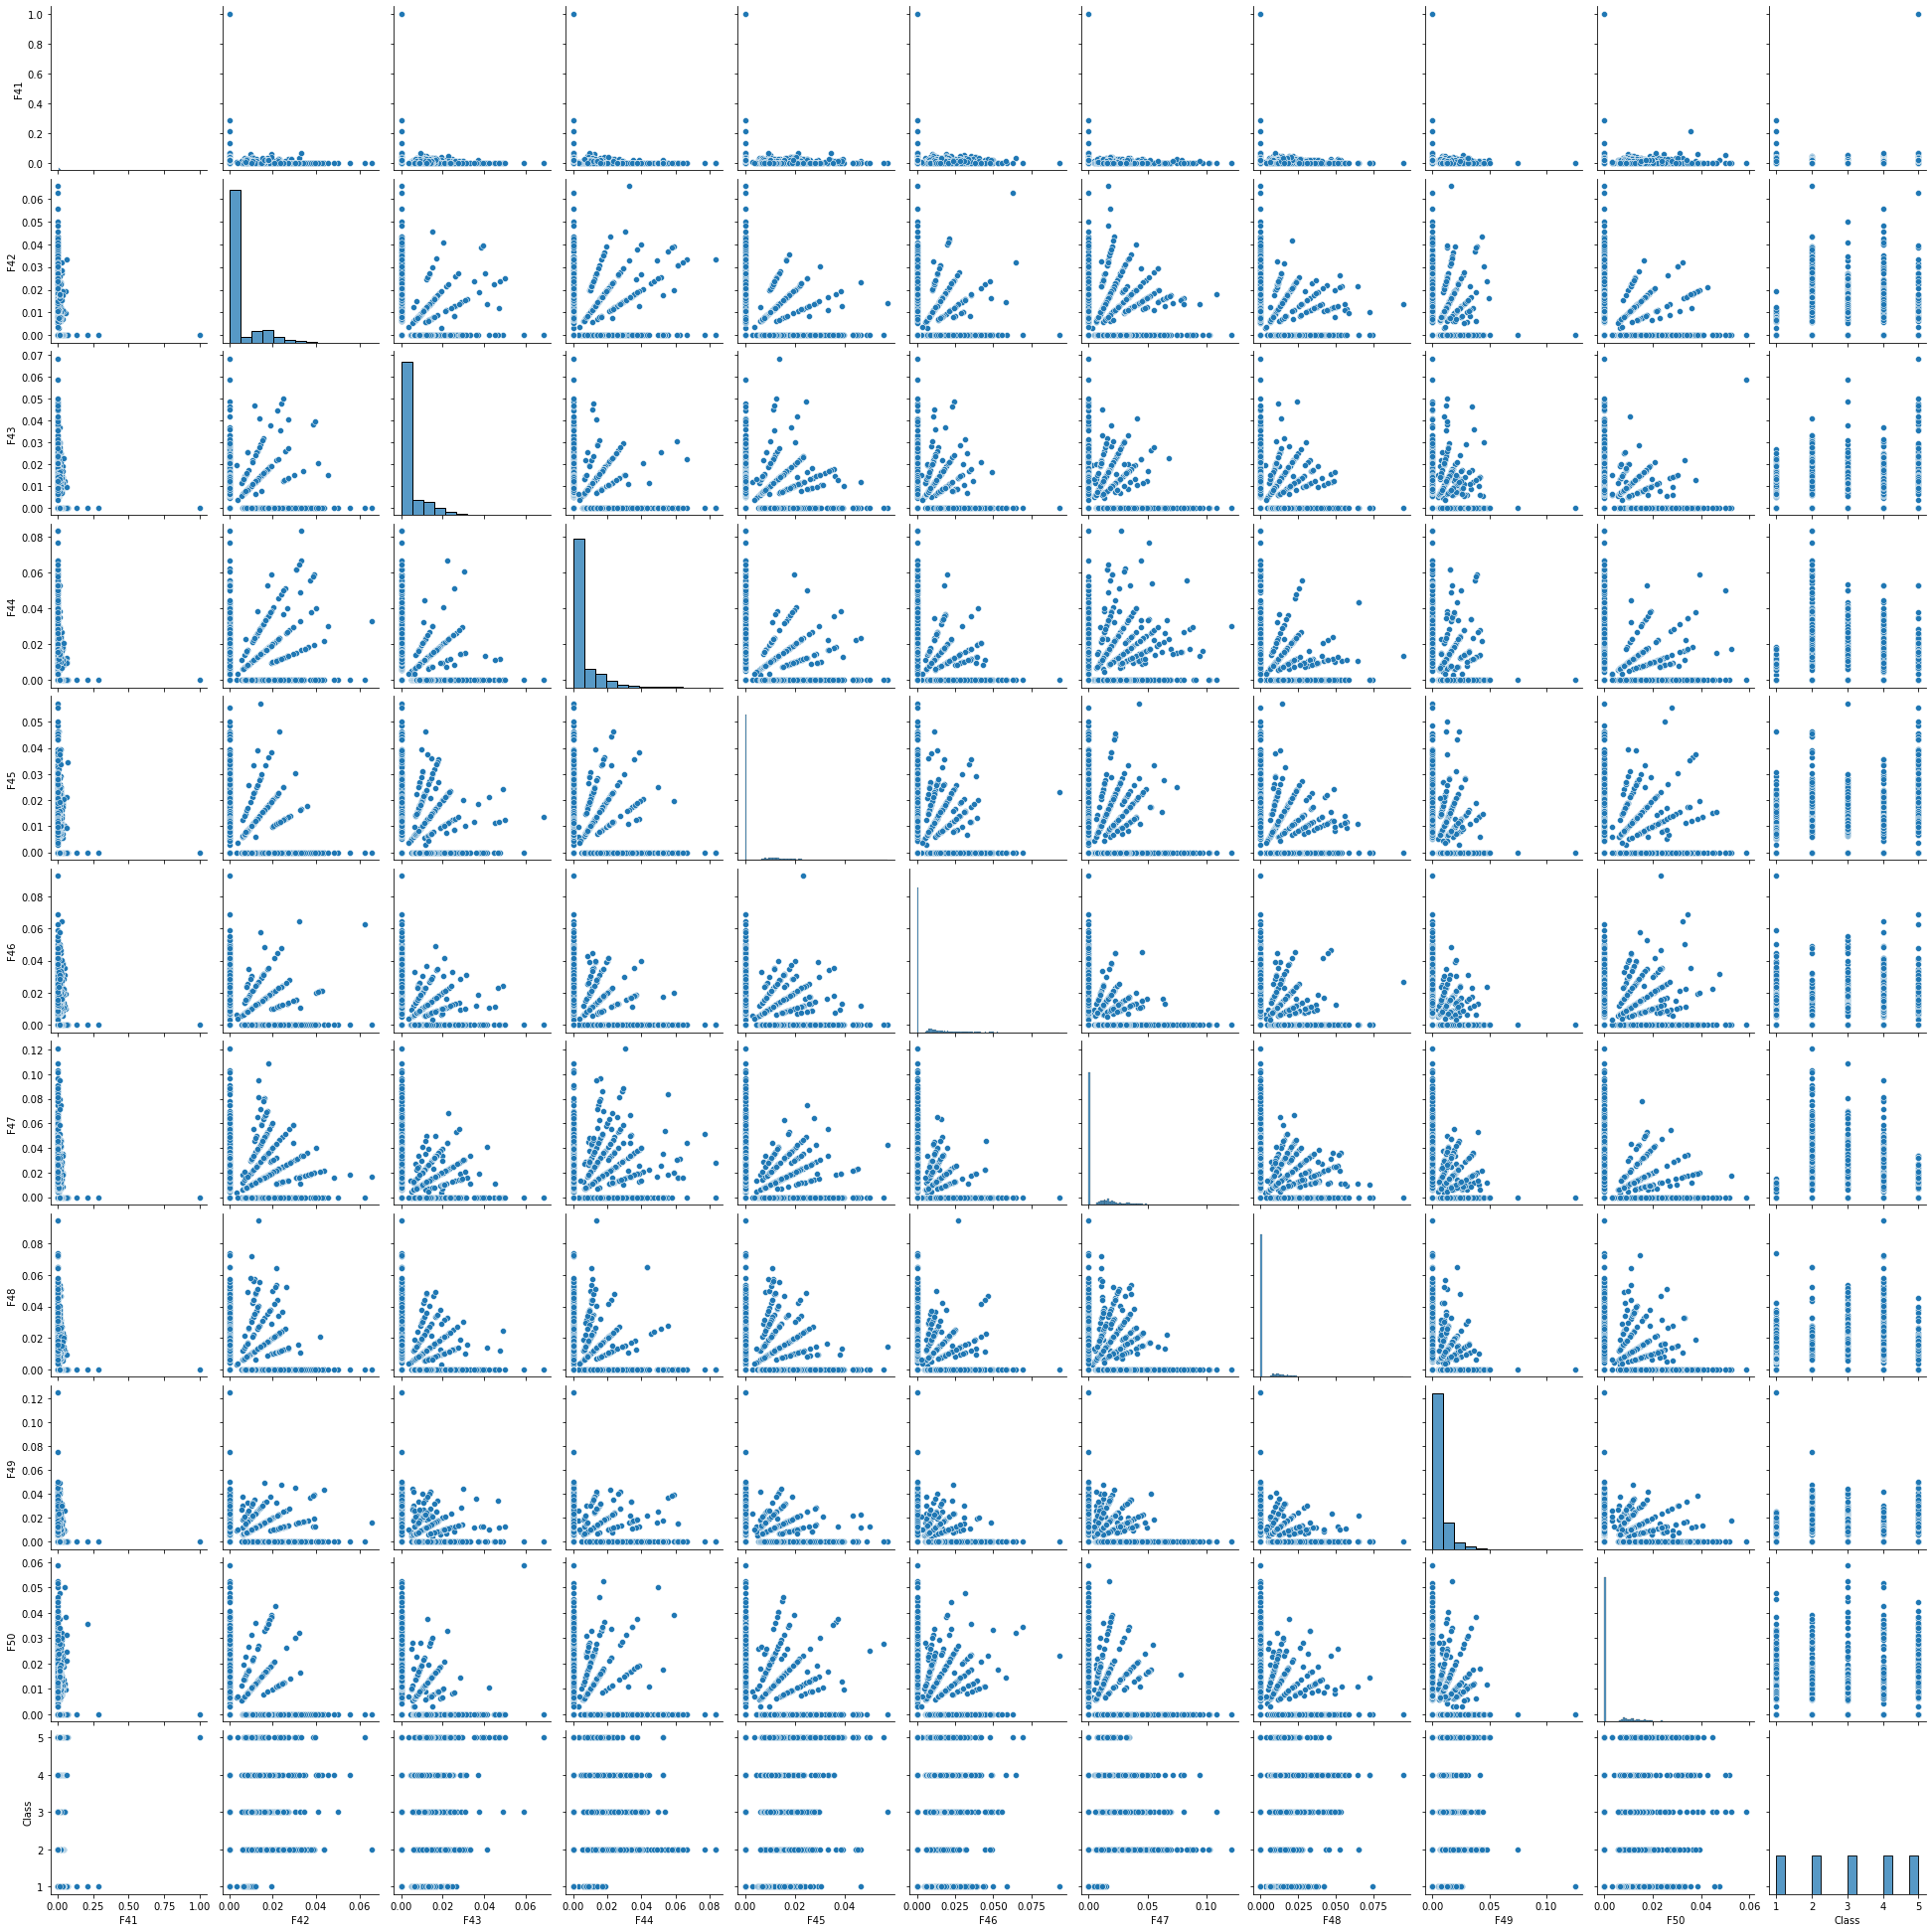

In [273]:
sns.pairplot(df_kel5)

Visualisasi diatas merupakan pair plot yang dapat menunjukkan hubungan antar feature dan hubungan antar feature dan output. Dari sini, dapat diketaui distribusi data (garis diagonal pada grafik) merupakan grafik yang menunjukkan distribusi data, dari grafik tersebut dapat diketahui bahwa feature pada penelitian ini kebanyakan memiliki distribusi data yang miring (skewed). Selain itu, dari pair plot juga dapat diketahui outlier yang terdapat pada data,diputuskan untuk tidak membuang outlier. Hal ini dikarenakan data pada penelitian ini merupakan data ekstraksi dari feature yang jika dibuang dikhawatirkan merupakan data asli yang penting. Sehingga, diputuskan untuk tidak membuang outlier dan memasukkan semua data ke model terlebih dahulu, baru kemudian melihat performa model. Jikalau performa model buruk (dibawah 70%) baru akan dilakukan percobaan untuk membuang outlier.

#### b. [LO 1 & LO 3, 15 poin] Buatlah tahapan praproses terhadap data di atas. Tentukan apakah data tersebut membutuhkan normalisasi/standarisasi, fitur selection/dimensional reduction, atau outlier detection. Jelaskan mengenai tahapan yang kalian pilih dan berikan alasan terhadap pendekatan yang Anda lakukan.

In [274]:
df_diatas1 = df>1
(df_diatas1==True).sum()
#Tidak ada data yang nilainya diatas 1

F1          0
F2          0
F3          0
F4          0
F5          0
         ... 
F197        0
F198        0
F199        0
F200        0
Class    3264
Length: 201, dtype: int64

In [275]:
df_dibawah1 = df<0
(df_dibawah1==True).sum()
#Tidak ada data yang nilainya dibawah 0

F1       0
F2       0
F3       0
F4       0
F5       0
        ..
F197     0
F198     0
F199     0
F200     0
Class    0
Length: 201, dtype: int64

Dengan pembuktian di atas, tidak ada data yang nilainya dibawah 0 dan di atas 1. Hal ini menunjukkan data telah memiliki skala dari 0-1. Sehingga, tidak dibutuhkan proses normalisasi data.

Setelah melakukan pembuktian skala data (pembuktian untuk membuktikan apakah dibutuhkan normalisasi atau tidak) dilakukan analisa apakah dibutuhkan dimentionaliti reduction atau feature selection. Pada data tersebut, diputuskan untuk tidak menggunakan dimentionality reduction karena data input merupakan data ekstraksi dari foto, sehingga untuk tahap awal, semua data ini dianggap penting. Kemudian dilanjutkan dengan memasukkan semua data terlebih dahulu ke dalam model sehingga didapatkan performa model, jika didapatkan performa model yang buruk, barulah akan dilakukan percobaan untuk melakukan tahap reduksi dimensi.

- Partisi Data

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

In [277]:
X= df.drop(["Class"], axis=1)
y = df["Class"]

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [279]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [280]:
pred_knn = neigh.predict(X_test)
pred_knn

array([4, 3, 3, ..., 4, 4, 4], dtype=int64)

In [281]:
y_test

2765    4
2223    3
1691    3
1944    3
2455    4
       ..
353     1
446     1
3061    4
2928    4
3023    4
Name: Class, Length: 1224, dtype: int64

#### c. [LO 1 & LO 3, 15 poin] Gunakan dua metode machine learning untuk klasifikasi dalam menyelesaikan data di atas. Berikan alasan terhadap metode yang Anda pilih.

- KNN Classifier

Digunakan KNN classifier pada kasus ini karena algoritma KNN merupakan aloritma yang cocok untuk data yang besar, cepat dalam pemrosesan, dan tahan terhadap data pelatihan yang memiliki derau.

In [282]:
knn_acc_score = accuracy_score(y_test, pred_knn)
print('accuracy of knn :', knn_acc_score*100)

accuracy of knn : 91.83006535947712


- Random Forest Classifier

Digunakan Random Forest Classifier pada kasus ini karena algoritma ini dapat mengatasi klasifikasi pada data yang besar secara efisien dan memiliki beberapa parameter yang dapat diubah2 sesuai kebutuhan untuk meningkatkan performa model.

In [283]:
from sklearn.ensemble import RandomForestClassifier

In [284]:
rfc = RandomForestClassifier(n_estimators=400, criterion = 'entropy', max_features= 'log2')
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [285]:
rfc_acc_score = accuracy_score(y_test, pred_rfc)
print('accuracy of rfc :', rfc_acc_score*100)

accuracy of rfc : 91.25816993464052


#### d. [LO 1 & LO 3 10 poin] Evaluasi dan komparasi hasil yang didapatkan dari dua metode klasifikasi pada poin sebelumnya. Gunakan metric yang sesuai, dan jelaskan hasil yang Anda dapatkan.


Dari hasil diatas, diketahui metode KNN menghasilkan akurasi lebih baik. Kemudian untuk matriks yang digunakan sebaiknya matriks akurasi, dikarenakan matriks ini merepresentasikan tingkat kemiripan antara hasil pengukuran dengan nilai yang sebenarnya diukur. Sementara untuk Recall dan Presisi merepresentasikan jumlah nilai positif yang salah, sedangkan recall merepresentasikan jumlah nilai negatif yang salah pada perhitungan model.